# Analysis of Blazhko stars

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#| code-fold: false
# IMPORTING LIBRARIES
# --------------------

# AstroML
from astroML.datasets import fetch_LINEAR_sample
from astropy.coordinates import SkyCoord
import astropy.units as u

# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

# CONFIGURATION
# -------------
sns.set_theme() # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
colors = ['#5F6372', '#79A8A4', '#B2AD8F', '#92A186', '#AD8082']
blue = '#5F6372'
turqoise = '#79A8A4'
light_green = '#B2AD8F'
green = '#92A186'
pink = '#AD8082'
muted_colors = sns.set_palette(sns.color_palette(colors))

# configuring fonts for plotting
font = FontProperties()
font.set_family('avenir')
font.set_name('Big Caslon')
font.set_style('normal')
font.set_size('xx-large')


%matplotlib inline  

In [3]:
#| code-fold: false
# Importing custom libraries
# ----------------------------
sys.path.insert(0,'../src/')
from BE_plotting import*
#from RR_lyrae_params import*
from blazhko_analysis import*

In [5]:
#| code-fold: false
# DATA
dataLINEAR = fetch_LINEAR_sample(data_home='../inputs') # fetching the data from astroML data library
end = 'ffinal'

# DATA from previous notebook
BE_STARS = pd.read_csv("../outputs/FINAL_BE_CATALOGUE.csv")
rrlyrae = pd.read_csv('../outputs/Lrrlyr_unprocessed.csv')
periodogr = pickle.load(open("../outputs/periodograms_"+end+".pkl", "rb"))
fits = np.load("../outputs/fits_"+end+".npy", allow_pickle=True)
ztf_data = np.load("../outputs/ztf_data_filter"+end+".npy", allow_pickle=True)

In [6]:
BE_STARS.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_chi2dof,L_chi2dofR,Lmean_chi2dof,Lmean_chi2dofR,...,BlazhkoPeakZ,BlazhkoPeriodZ,BpowerRatioZ,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp
0,523832,0.372376,0.372384,0.372380,1.000021,251,1.8,1.2,1.9,1.3,...,2.7122,37.3413,0.1528,6.3617,0.17,0.00002,Z,NaN,NaN,NaN
1,1240665,0.632528,0.632522,0.632525,0.999991,468,25.2,3.0,25.4,2.9,...,1.5865,182.3154,0.0570,15.9957,0.00,0.00001,Z,NaN,NaN,NaN
2,1736308,0.555848,0.555843,0.555846,0.999991,372,2.9,1.3,3.0,1.2,...,1.8264,36.6367,0.0529,5.6501,0.11,0.00001,Z,NaN,NaN,NaN
3,2669011,0.591153,0.591151,0.591152,0.999997,450,2.4,1.1,2.3,1.1,...,1.7015,101.2146,0.0751,6.5360,0.16,0.00000,Z,NaN,NaN,NaN
4,2742032,0.629676,0.629692,0.629684,1.000025,514,1.8,0.9,1.9,1.0,...,1.5956,133.2445,0.0602,7.4751,0.34,0.00003,Z,NaN,NaN,NaN


## Adding the light curve type

In [7]:
rrlyrae.head()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
0,119.526443,46.962120,1.166,0.369,1.018,0.269,-0.254138,0.619,-0.313,-0.567,16.37,301,1,29848
1,119.712975,52.149574,1.175,0.386,1.100,0.205,-0.191591,0.487,-0.291,-0.879,16.46,284,1,50402
2,119.187241,53.379295,1.123,0.207,1.074,0.210,-0.275092,0.624,-0.547,-0.322,16.54,276,1,62892
3,120.294960,40.932457,1.180,0.237,1.087,0.368,-0.170871,0.753,-0.121,-0.927,15.39,177,1,91437
4,120.124542,40.656620,1.178,-0.145,0.835,0.277,-0.503252,0.550,0.140,-0.650,16.98,222,2,95250


In [10]:
LINEAR_RRLR = pd.read_csv('../outputs/Lrrlyr_unprocessed.csv')

In [11]:
LINEAR_RRLR.head()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
0,119.526443,46.962120,1.166,0.369,1.018,0.269,-0.254138,0.619,-0.313,-0.567,16.37,301,1,29848
1,119.712975,52.149574,1.175,0.386,1.100,0.205,-0.191591,0.487,-0.291,-0.879,16.46,284,1,50402
2,119.187241,53.379295,1.123,0.207,1.074,0.210,-0.275092,0.624,-0.547,-0.322,16.54,276,1,62892
3,120.294960,40.932457,1.180,0.237,1.087,0.368,-0.170871,0.753,-0.121,-0.927,15.39,177,1,91437
4,120.124542,40.656620,1.178,-0.145,0.835,0.277,-0.503252,0.550,0.140,-0.650,16.98,222,2,95250


In [12]:
len(list(LINEAR_RRLR['LINEARobjectID']))

2941

In [13]:
lctype = []

for i in range(len(list(LINEAR_RRLR['LINEARobjectID']))):
    lctype.append((LINEAR_RRLR['LINEARobjectID'][i], LINEAR_RRLR['LCtype'][i]))

be_lctype = []
for i in list(BE_STARS['LINEAR id']):
    for n in lctype:
        if i==n[0]:
            be_lctype.append(n)
print(len(be_lctype))
print(be_lctype[:4])

LCTYPE = [x[1] for x in be_lctype]
print(LCTYPE[:4])

136
[(523832, 2), (1240665, 1), (1736308, 1), (2669011, 1)]
[2, 1, 1, 1]


In [14]:
BE_STARS['LCtype'] = LCTYPE

In [15]:
BE_STARS.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_chi2dof,L_chi2dofR,Lmean_chi2dof,Lmean_chi2dofR,...,BlazhkoPeriodZ,BpowerRatioZ,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp,LCtype
0,523832,0.372376,0.372384,0.372380,1.000021,251,1.8,1.2,1.9,1.3,...,37.3413,0.1528,6.3617,0.17,0.00002,Z,NaN,NaN,NaN,2
1,1240665,0.632528,0.632522,0.632525,0.999991,468,25.2,3.0,25.4,2.9,...,182.3154,0.0570,15.9957,0.00,0.00001,Z,NaN,NaN,NaN,1
2,1736308,0.555848,0.555843,0.555846,0.999991,372,2.9,1.3,3.0,1.2,...,36.6367,0.0529,5.6501,0.11,0.00001,Z,NaN,NaN,NaN,1
3,2669011,0.591153,0.591151,0.591152,0.999997,450,2.4,1.1,2.3,1.1,...,101.2146,0.0751,6.5360,0.16,0.00000,Z,NaN,NaN,NaN,1
4,2742032,0.629676,0.629692,0.629684,1.000025,514,1.8,0.9,1.9,1.0,...,133.2445,0.0602,7.4751,0.34,0.00003,Z,NaN,NaN,NaN,1


## Nice graphs

- blazhko period histogram D
- difference between main and blazhko frequency D
- chi2 LINEAR vs. ZTF graph D
- RRAB and RRC ditribution
- map of the sky with blazhko stars

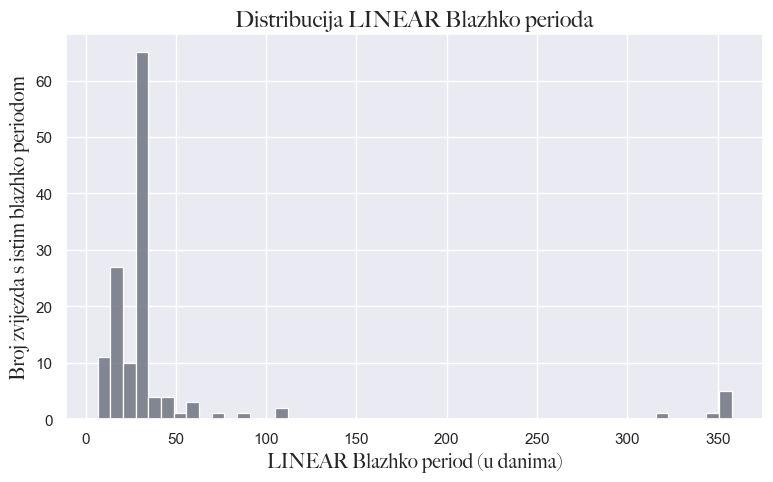

In [26]:
# Blazhko period histogram
# -----

plt.figure(figsize=(9,5))
sns.histplot(data=list(BE_STARS['BlazhkoPeriodL']),color=blue, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija LINEAR Blazhko perioda', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR Blazhko period (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istim blazhko periodom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkoperiodL.png', dpi=650)
plt.show()

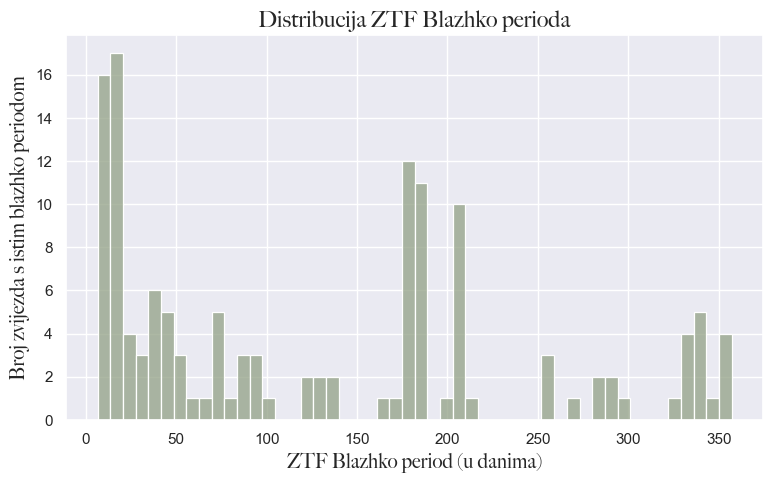

In [27]:
# Blazhko period histogram
# -----

plt.figure(figsize=(9,5))
sns.histplot(data=list(BE_STARS['BlazhkoPeriodZ']),color=green, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija ZTF Blazhko perioda', fontproperties=font,fontsize=16)
plt.xlabel('ZTF Blazhko period (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istim blazhko periodom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkoperiodZ.png', dpi=650)
plt.show()

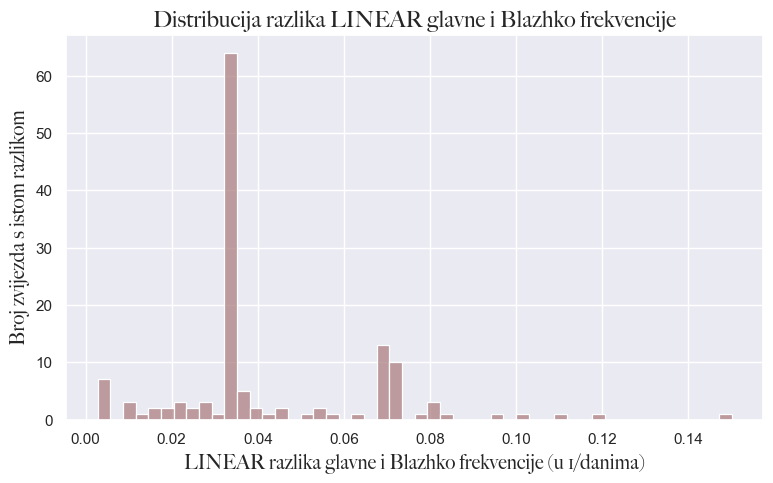

In [48]:
# histogram of frequency differences
# ------
plt.figure(figsize=(9,5))

freq_diff = list(BE_STARS['BlazhkoPeakL'] - BE_STARS['MainPeakL'])

sns.histplot(data=freq_diff,color=pink, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija razlika LINEAR glavne i Blazhko frekvencije', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR razlika glavne i Blazhko frekvencije (u 1/danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istom razlikom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkodiffL.png', dpi=650)
plt.show()

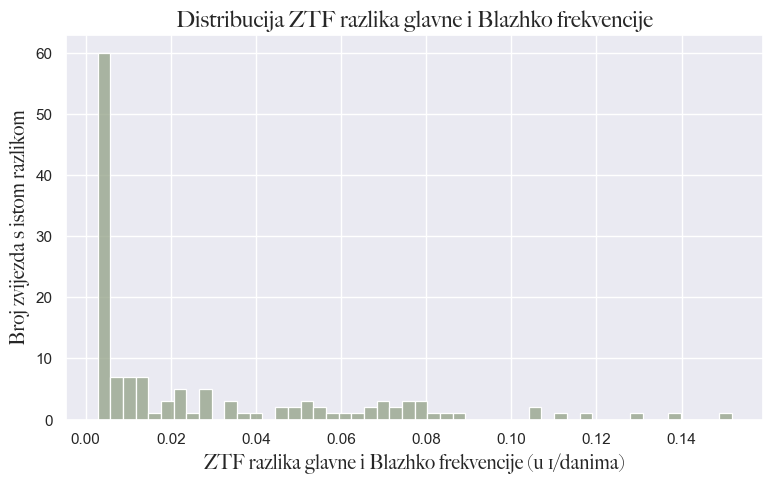

In [43]:
# histogram of frequency differences
# ------
plt.figure(figsize=(9,5))

freq_diff = list(BE_STARS['BlazhkoPeakZ'] - BE_STARS['MainPeakZ'])

sns.histplot(data=freq_diff,color=green, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija ZTF razlika glavne i Blazhko frekvencije', fontproperties=font,fontsize=16)
plt.xlabel('ZTF razlika glavne i Blazhko frekvencije (u 1/danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istom razlikom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkodiffZ.png', dpi=650)
plt.show()

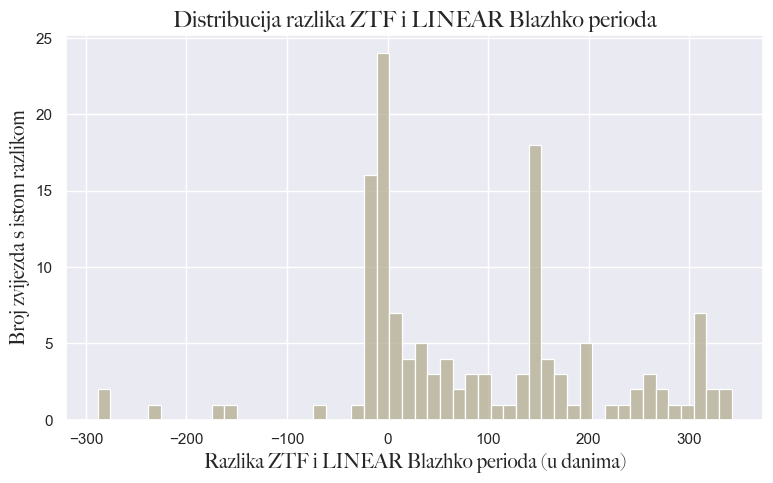

In [47]:
# histogram of frequency differences
# ------
plt.figure(figsize=(9,5))

freq_diff = list(BE_STARS['BlazhkoPeriodZ'] - BE_STARS['BlazhkoPeriodL'])

sns.histplot(data=freq_diff,color=light_green, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija razlika ZTF i LINEAR Blazhko perioda', fontproperties=font,fontsize=16)
plt.xlabel('Razlika ZTF i LINEAR Blazhko perioda (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istom razlikom', fontproperties=font,fontsize=14)
plt.savefig('../images/Blazhkodiffperiod.png', dpi=650)
plt.show()

In [31]:
LC_analysis = pd.read_csv("../outputs/LC_ANALYSIS_"+end+".csv")
LC_analysis.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_chi2dof,L_chi2dofR,Lmean_chi2dof,Lmean_chi2dofR,...,MainPeakZ,BlazhkoPeakZ,BlazhkoPeriodZ,BpowerRatioZ,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score
0,29848,0.557020,0.557040,0.557030,1.000036,301,3.0,1.4,3.3,1.6,...,1.7952,1.7982,333.3333,0.2573,10.0729,0.37,0.00004,NaN,NaN,NaN
1,50402,0.643303,0.643294,0.643298,0.999986,284,0.6,0.7,0.6,0.7,...,1.5545,1.5918,26.8420,0.0027,8.9208,0.21,0.00001,NaN,NaN,NaN
2,62892,0.530776,0.530785,0.530780,1.000017,276,1.1,0.9,1.1,1.0,...,1.8840,1.9433,16.8634,0.0048,13.1609,0.02,0.00002,NaN,NaN,NaN
3,91437,0.674733,0.674737,0.674735,1.000006,177,2.8,1.3,2.8,1.3,...,1.4821,1.4849,355.8719,0.0233,16.1566,0.34,0.00001,NaN,NaN,NaN
4,95250,0.313870,0.313876,0.313873,1.000019,222,0.8,0.8,0.9,0.8,...,3.1860,3.1889,342.4658,0.0028,13.4528,0.02,0.00002,NaN,NaN,NaN


In [32]:
LC_analysis.shape

(2857, 34)

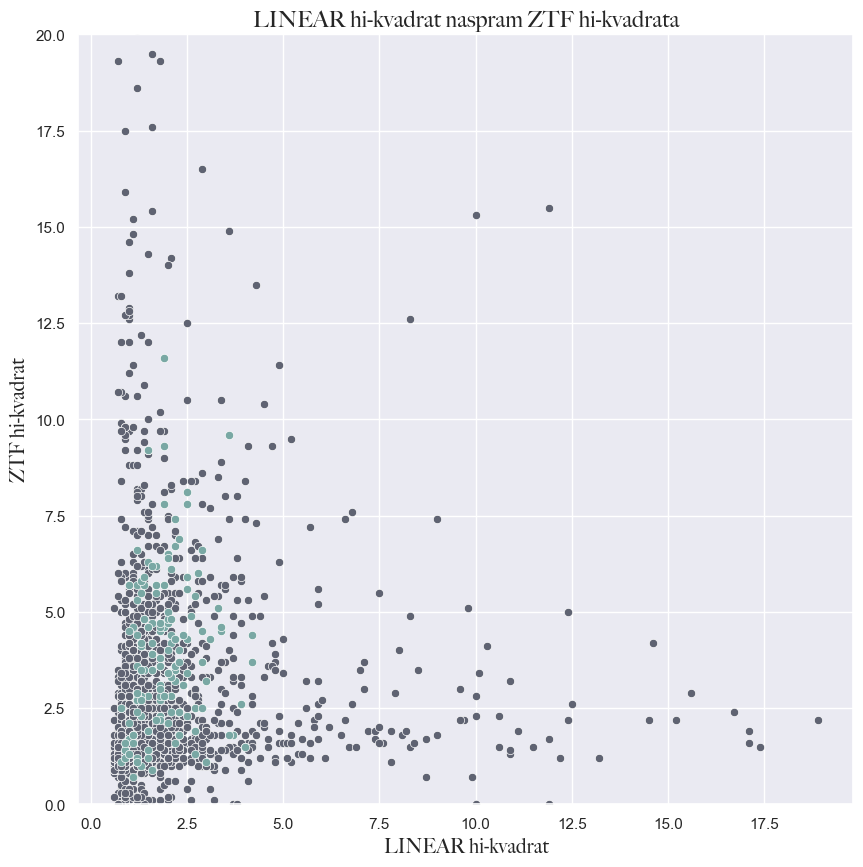

In [35]:
# scatterplot of periods
# ------
plt.figure(figsize=(10,10))

sns.scatterplot(data=LC_analysis, x='L_chi2dofR', y='Zchi2dofR')
sns.scatterplot(data=BE_STARS, x='L_chi2dofR', y='Zchi2dofR')
#plt.xlim([0, 1.1])
plt.ylim([0, 20])
plt.title('LINEAR hi-kvadrat naspram ZTF hi-kvadrata', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR hi-kvadrat', fontproperties=font, fontsize=14)
plt.ylabel('ZTF hi-kvadrat', fontproperties=font,fontsize=14)
plt.savefig('../images/chi_scatter.png', dpi=650)
plt.show()

In [36]:
lc_counts = BE_STARS['LCtype'].value_counts().reset_index()
lc_counts.columns = ['LCtype', 'Count']

In [37]:
p1 = round(lc_counts['Count'][0]/len(BE_STARS['LINEAR id']),4)*100
p2 = round(lc_counts['Count'][1]/len(BE_STARS['LINEAR id']), 4)*100
print(f'The percentage of RRAB stars is {p1}%, while for RRC stars it is {p2}% .')

The percentage of RRAB stars is 71.32%, while for RRC stars it is 28.68% .


In [38]:
coords = []

for i in range(len(list(LINEAR_RRLR['LINEARobjectID']))):
    coords.append((LINEAR_RRLR['LINEARobjectID'][i], LINEAR_RRLR['ra'][i], LINEAR_RRLR['dec'][i]))

be_coords = []
for i in list(BE_STARS['LINEAR id']):
    for n in coords:
        if i==n[0]:
            be_coords.append(n)
print(len(be_coords))
print(be_coords[:4])

ra = [x[1] for x in be_coords]
dec = [x[2] for x in be_coords]
print(dec[:4])

136
[(523832, 124.601967, 45.734329), (1240665, 170.448395, 3.474343), (1736308, 172.210449, 7.347865), (2669011, 179.175461, -3.469707)]
[45.734329, 3.474343, 7.347865, -3.469707]


In [39]:
#| code-fold: false
# DETERMINING THE RECTASCENSION AND DECLINATION COORDS
rec_ab = []
dec_ab = []
RA = ra
DEC = dec

for i in range(len(list(BE_STARS['LINEAR id']))): # for every id in our dataset
    # look for the index of the current id in the total dataset of stellar attributes
    ra, dec = RA[i], DEC[i] # select rectascension and declination
    rec_ab.append(ra*u.deg) # convert ra into degrees for later conversion
    dec_ab.append(dec*u.deg) # convert dec into degrees for later conversion

print(len(rec_ab), len(dec_ab))

136 136


In [40]:
#| code-fold: false
# CONVERTING THE COORDINATES INTO GALACTIC COORDS

l_ab = []
b_ab = []

for k in range(len(rec_ab)): # for every star in our ab dataset
    # selection of ra and dec coords
    ra = rec_ab[k]
    dec = dec_ab[k]

    # converting them into galactic coordinates
    c = SkyCoord(ra=ra, dec=dec, frame='icrs')
    l = round(c.galactic.l.degree, 3)
    b = round(c.galactic.b.degree, 3)

    # convert the coordinates into a range from -180º to 180º for our projection 
    l_rad = np.radians(l)
    l_rad = np.mod(l_rad + np.pi, 2.0 * np.pi) - np.pi
    b_rad = np.radians(b)

    l_ab.append(l_rad)
    b_ab.append(b_rad)
print(len(l_ab), len(b_ab))

136 136


In [41]:
BE_STARS['lab'] = l_ab
BE_STARS['bab'] = b_ab
BE_STARS.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_chi2dof,L_chi2dofR,Lmean_chi2dof,Lmean_chi2dofR,...,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp,LCtype,lab,bab
0,523832,0.372376,0.372384,0.372380,1.000021,251,1.8,1.2,1.9,1.3,...,6.3617,0.17,0.00002,Z,NaN,NaN,NaN,2,3.040905,0.590340
1,1240665,0.632528,0.632522,0.632525,0.999991,468,25.2,3.0,25.4,2.9,...,15.9957,0.00,0.00001,Z,NaN,NaN,NaN,1,-1.799766,1.013879
2,1736308,0.555848,0.555843,0.555846,0.999991,372,2.9,1.3,3.0,1.2,...,5.6501,0.11,0.00001,Z,NaN,NaN,NaN,1,-1.842614,1.084966
3,2669011,0.591153,0.591151,0.591152,0.999997,450,2.4,1.1,2.3,1.1,...,6.5360,0.16,0.00000,Z,NaN,NaN,NaN,1,-1.440281,0.989130
4,2742032,0.629676,0.629692,0.629684,1.000025,514,1.8,0.9,1.9,1.0,...,7.4751,0.34,0.00003,Z,NaN,NaN,NaN,1,-1.468782,1.081825


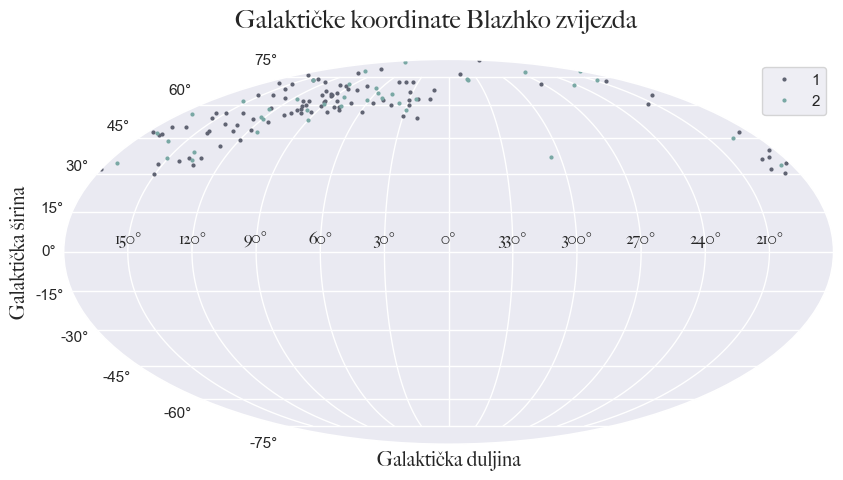

In [49]:
#| code-fold: false
# PLOTTING THE STARS

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')
groups = BE_STARS.groupby('LCtype')
for name, group in groups:
    plt.plot(group.lab, group.bab, marker='o', linestyle='', markersize=2, label=name)

ax.grid(True)
fig.suptitle('Galaktičke koordinate Blazhko zvijezda', fontproperties=font,fontsize=18)
ax.set_xticks(np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]))
ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'], fontproperties=font, fontsize=12)
ax.set_xlabel('Galaktička duljina', fontproperties=font, fontsize=14)
ax.set_ylabel('Galaktička širina', fontproperties=font, fontsize=14)
plt.legend()
plt.savefig('../images/galactic_coords_blazhko.png', dpi=650)
plt.show()